# Image Recognition - Pytorch

Going to look at validation sets, to validate the NN to see how well it generalizes to new data. Then use to make new predictions. 

### Lesson 1: MNIST Dataset
Will use MNIST Dataset and make a neural network. 
MNIST is a dataset of handwritten numbers, commonly used to demonstrate the true power of deep NN. With a deep NN, a computer can be trained to classify the hand written digits. When dealing with multi class data, we make use the softmax activation function in the output rather than the sigmoid function (which is used in binary class data sets). 

Softmax will occur under the hood once the NN is trained. MNIST is multiclass dataset with 10 classes (intergers 0 to 9). Previously, datapoints were used for NN. With the MNIST, a single datapoint is an image with 28x28 pixels = 784 pixels that must be analyzed. Therefore we need 784 nodes in the input layer, a few hidden layer that feed forward the input layers, and an output layer with 10 nodes.


--
MNIST data set = a database of handwritten digits. Demonstrate the power of DNN. Handwritten letteres/numbers can be written very differently. DNN is needed to effectively recognize the digists. 

Multiclass data - use softmax activation funciton in output layer (instead of the sigmoid, which is good for binary datasets and arranging probabiliyt bewteen 0 and 1). 

Data used to was a set of data points with x and y coordinates. Input layer = 2 nodes to input 1 data point. 

But with endless dataset, the data is an image...typically 28x28 pixels. Single image has 28x28 = 784 pixels that need to be analyzed. Need 784 nodes in the input layer then... This is much more complex than what we've analyzed before. So we need a DNN with hidden layers to analyze. 

INPUT = 784 nodes, hidden layers, and then output layer of 10 nodes with numbers 0 to 9. 



### Lesson 2: Training
Data will be split into training and testing set. Then we create a model that will classify the training data accurately. By comparing the prediction to their actual labels we can start to minimize the error (cross entropy value) by updating the parameters of weight and biases between nodes. Constant updating the predicted labels can train the algorithm better and minimize the training error to get higher accruacy. 

Training images are used to train the nn, and train parameters until error is minimized. So when the model looks at new data, we can see how well it predicts, and how well the model can generalize to classify new data. Need the generalization error to be low too. Need the model to minimize the training error, but also minimize the test error - need the gap between test and train error to be small. 

1. Small training error - underfitting
    - Cannot fit the training sets and cannot capture underlying trend
2. Gap between test and train error grows - overfitting 
    - Exactly understands the training points, but cannot extract correct structure and unable to generalize new data. 

Gradient descent aim to reduce training error while regularization is necessary to reduce the generalization (testing) error. 

-- 
Data is split between a training and test set. Training set = has inputs and labels. NN learns from the data to come up with a model, which eventually classifies the training data accurately. By comparing the predictions made, we minimize the error, cross entropy value, and move towards the direction of the least error. As minimize error, starts to classify more data correctly. Constantly updating the labels, we can keep training algorithm until we get better predictions with higher accuracy. 

Test image vs train image. Train used to train model until error is minimized. So with new data, how well does the model classify the test data? Don't want the classifer to only be able to classify on only trained data...so use a test set for generalization. Also need to make the test error (generalization error) to be low too. Models seem to memorize training data well...but need to look at general features - succeed with the test error. 

At some point, more we minimize the training error, we'll get a higher test data. Want to make sure training AND test error small. 

1. Small training error - challenge underfitting
2. Gap between test and training error grows large - challenge overfitting

Underfitting: model isn't able to capture data's underlying trend. Not possible to classify training set. Need to be flexible enough to fit the training data. With a linear regression, might likely underfit. 

Comparing a linear and quadratic function to a quadratic like data. Linear function will underfit, while quadratic will be able to fit and generalize. Fit capacity of a model is too high, then there's overfitting. If we have a polynomial function...then cannot generalize new data. 

Overfit = performs well on trained, but bad on test data. More hidden layers, will be able to capture idiosyncracies of the data better. How to fix overfitting, may need to reduce the depth and complexity, reduce number of nodes, reduce epochs, etc. - different mtehods to reduce capacity of model. 

Larger datasets can also reduce overfitting. SMallest gap between training and test error gives best model. More training - can memorize the training data, but then the test error gets high = this is when you have overfitting. Which means regularization is very important in ML. 

### Lesson 3. Image Transforms

In [104]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [128]:
#need to transform the image from an array to a tensor
#this will convert numpy array with values 0 to 255, to a float tensor from 0 to 1
#normalization reduces skewness and distortions within our data
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                                ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#training_dataset
validation_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
##validation_dataset. Needs to be 20% of the training data


#need to divide images into batches
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
#with shuffle, to ensure reach a global minimum rather than local min with gradient descent

##validation loader
validation_loader =  torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)
##not going to be training the model based on the validation data, so we don't need to shuffle

In [106]:
#To plot dataset though we need a numpy array instead of a tensor
def im_convert(tensor):
    image = tensor.clone().detach().numpy() #before making a numpy array
    image = image.transpose(1, 2, 0) #to get a 28, 28, 1 shape
    #print(image.shape)
    #denormalize image
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

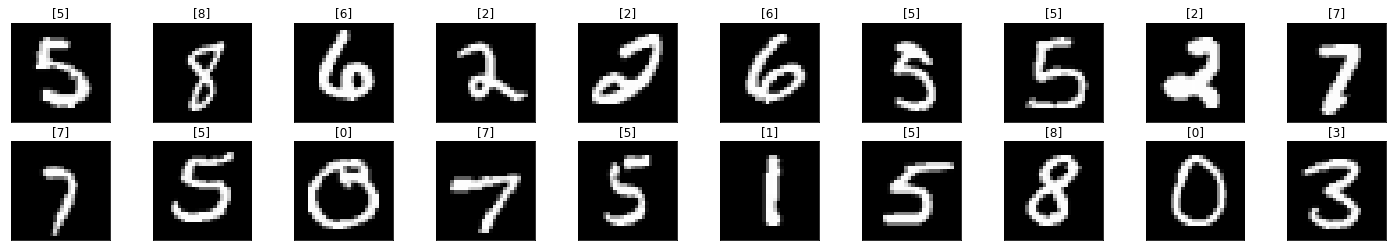

In [107]:
dataiter = iter(training_loader)
images, labels = dataiter.next() #grab first batch of training data and split by images and labels
fig = plt.figure(figsize=(25, 4))


for idx in np.arange(20):
    #2 rows and 10 columns, idx starts at 0 so need to add 1
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    #image[idx] is a tensor. so we use im_convert to get numpy
    #get rid of tick marks by setting them to empty list
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

### Lesson 4: Neural Network Implementation


In [108]:
#define class to create nn instances
#need to import Classifier from torch
class Classifier(nn.Module):
#followed by init method
    def __init__(self, D_in, H1, H2, D_out): 
        #arguments is dictated by the number of hidden layers in the network
        #first input is always self
        #second is number in input nodes
        #two hidden layers
        #and output layer
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1) #input layer going to first hidden layer
        self.linear2 = nn.Linear(H1, H2) #first hidden layer to second hidden layer
        self.linear3 = nn.Linear(H2, D_out) #second and last hidden layer
    def forward(self, x): #x is the input we're trying to feed forward
        x = F.relu(self.linear1(x)) #need the relu instead of sigmoid function
        #relu is good for cnn better 
        x = F.relu(self.linear2(x))
        x = self.linear3(x) 
        #no need to apply activation function here because dealing with multiclass dataset
        #this will get the raw output of the network
        #this is called a score (when calculating cross entropy loss)
        #nn.CrossEntropyLoss function used for multi class classification. uses log probabilities
        #use log probablities such that cross entropy loss to compute loss... getting score
        #no soft max acitvation function applied
        return x

In [109]:
model = Classifier(784, 125, 65, 10) #number of nodes in each layer
model
#784 inputs, 125 first H1, 65 nodes in 2nd H2, and 10 outputs

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001) 
#low learning rate of first 0.01
#then change the learning rate to 0.0001
#more efficeint for cnn for image classification, but going t o tune learning paramters

In [111]:
#specifiy number of epochs
epochs = 15
#want to analyze loss after each epoch so need to graph
running_loss_history = []
running_corrects_history = [] #store accruacy at each epoch

##validation part
val_running_loss_history = []
val_running_corrects_history = []

#iterate through each epoch
for e in range(epochs):
    #need to go through each training batch provided by training loader
    running_loss = 0.0
    running_corrects = 0.0
    
    ##after training, we iterate through validation set to test our data
    #measure performance to check for overfitting 
    ##validation
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader:
        #need to reshape or flatten each image tensor
        #1, 28, 28 images.... 
        #need to make images 1D. So instead of 28x20. we need to make it 784 pixels
        inputs = inputs.view(inputs.shape[0], -1) #-1 will infer the value of 2nd index
        #1, 784 (index 1 will have the number of pixels)
        outputs = model(inputs) #call the forward function to get raw final score
        #output is compared to actual labels
        loss = criterion(outputs, labels) #compare and determine error based on cross entropy criterion
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1) #first value is max score that was made by the model
        running_loss += loss.item() #append the current loss at the batch iteration to the loss list
        #want to compare the prediction to the actual label to see how many got correct
        #second value will be top predictions
        running_corrects += torch.sum(preds == labels.data) #every element of both tensors, compare the prediction to the actual class label
        #if comparision matches, then will place a value of one
    
    
    else:
        with torch.no_grad(): #set all requires grad flags to be false
        ##validation
            for val_inputs, val_labels in validation_loader: 
                #make predictions and calculate loss for validation
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                
        epoch_loss = running_loss/len(training_loader) #get the average loss at the epoch
        epoch_acc = running_corrects.float()/ len(training_loader) #average accuracy at that epoch
        #now append
        running_loss_history.append(epoch_loss) #observe decrease in loss at every epoch
        running_corrects_history.append(epoch_acc)
        
        ##same for validation
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float()/ len(validation_loader) 
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        
        print('epoch :', (e+1)) #because epoch starts at 0
        print('training loss: {:.4f}, acc {:.4f}'.format(epoch_loss, epoch_acc.item()))
        print('validation loss: {:.4f}, validation acc {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))
        
        

epoch : 1
training loss: 0.9332, acc 77.2700
validation loss: 0.4426, validation acc 87.9133
epoch : 2
training loss: 0.3803, acc 89.2867
validation loss: 0.3393, validation acc 90.3800
epoch : 3
training loss: 0.3175, acc 90.8267
validation loss: 0.2959, validation acc 91.2700
epoch : 4
training loss: 0.2830, acc 91.8017
validation loss: 0.2671, validation acc 92.2133
epoch : 5
training loss: 0.2570, acc 92.5733
validation loss: 0.2428, validation acc 93.0883
epoch : 6
training loss: 0.2346, acc 93.2217
validation loss: 0.2296, validation acc 93.4450
epoch : 7
training loss: 0.2144, acc 93.8150
validation loss: 0.2018, validation acc 94.1917
epoch : 8
training loss: 0.1974, acc 94.3183
validation loss: 0.1877, validation acc 94.5833
epoch : 9
training loss: 0.1821, acc 94.7450
validation loss: 0.1717, validation acc 95.0583
epoch : 10
training loss: 0.1695, acc 95.1033
validation loss: 0.1627, validation acc 95.3083
epoch : 11
training loss: 0.1581, acc 95.4250
validation loss: 0.1546

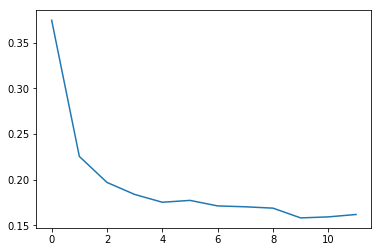

In [57]:
#visualize with plots. Learning rate with 0.01
plt.plot(running_loss_history, label='training loss')


Loss fluctuates with more epochs. Because gradient descent gradually adjusts the parameters of the model in the direction of least error. The steps that it takes is dictated by the learning rate. If the learning rate is too high, then the steps will be too big and the parameters will start to diverge and overshoot the minimum. 

Usually decreasing the learning rate is better to have the model to zero in to the solution. so now we can decrease the learning rate from 0.01 to 0.0001 instead! But a low learning rate can cause a model to get stuck in a local minimum too... 

Many ways to find optimal learning rate. But most general is to start with a high lr and then adjust with emperical results. LR is a an important parameter to tune and can make a difference between a good model that yields accurate and generalized results or not. 

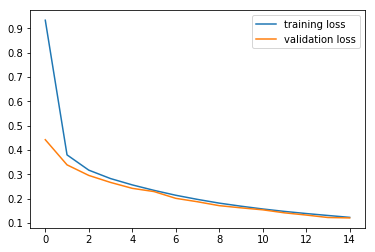

In [112]:
#visualize with plots. Learning rate with 0.0001
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

Much smaller error and could even decrease even more. But there's a consistent decrease in loss.

With increasing epochs, should be able to see that the validation error becomes higher than the training error which means you start over fitting. If significant difference in validation loss, then need to really tune the hyperparameters a lot more. 

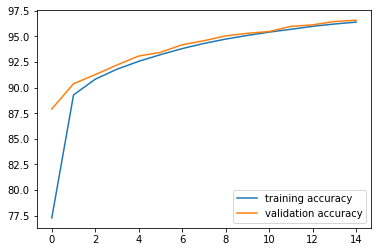

In [113]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

See a pretty good accuracy. But can the model generalize? Need to validate the model.

With more epochs, the validation accuracy will decrease... can test this. 

### Lesson 5: Neural Network Validation
True testment of performance is to see if the model can predict new data. 

Above where we're setting the training_dataset, we now define a validation dataset ##

Validation loss continuously decreases throughout every epoch and acurracy converges too. So this shows that the model is good at generalizing on new data (accuracy ~96%)

### Lesson 6: Final Tests

Grabbing an emage from the web and use that to test the model.

<Response [200]>


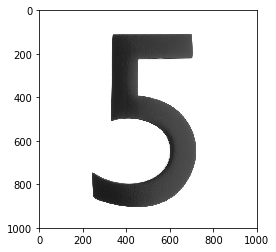

In [131]:
import requests #to grab an image
from PIL import Image #python imaging library
import PIL.ImageOps
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
print(response) #successful get request

Make sure the image corressponds to what the neural network is trained to learn. Need it a 28x28 grayscale image. In this case we have a white background instead of a black background. So we need to inverse it.

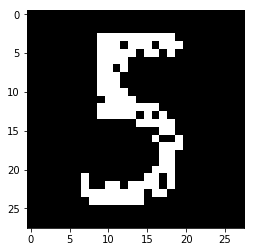

In [132]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) #ensure 28x28 with transform function
plt.imshow(im_convert(img))

#looks pretty close to MNIST iamges

Now can feed image to make a prediction!

In [133]:
img = img.view(img.shape[0], -1) #reshape 1 image by 784 pixels
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item()) #should get an output of score. take class of highest score

5


We see that it makes the accurate prediction that the image is a 5. Now we want to make predictions of all the images at once!

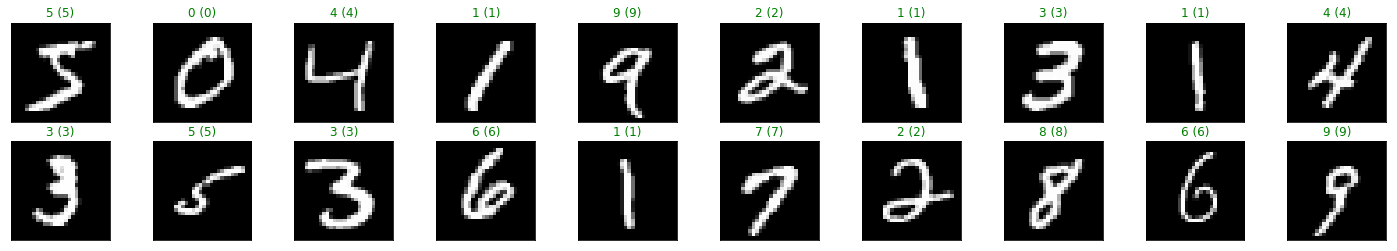

In [134]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1) #reshape the same
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    #modifying the title for each image
    #set green if the label is correct, red if label is incorrect
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))


Accuracy for a DNN will plateau at a certain point and more hidden layers and more nodes may result in overfitting. 

So CNN are best for image classification...which makes processing more computationally manageable when the images are larger and colored. 

### Lesson 7: Adjusting batch sizes

To get epoch accuracy we devided by the number of batches. Each batch we want to check how many predictions are correct based on 100 image per batch. That gives you an average percentage.

But if batch size is 90...then we wouldn't get a percentage. But if we divide the number of correct preditions by the total number of images, we do get a probability. 

More on this later